In [50]:
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


## LOAD DATASET

In [51]:
df = pd.read_csv('dataset_sdn.csv', sep=';')

In [52]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0,0.0,0.0


## Shape Dataset

In [53]:
df.shape

(104345, 23)

## Informasi Dataset

In [54]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps          int64
tot_kbps       float64
label          float64
dtype: object

*Disini ada beberapa data yang object kemungkinan perlu dilakukan transformasi agar dapat digunakan, sehingga juga bisa diketahui keterkaitan satu dengan lainnya 

## Check Missing Value dan Duplicate 

In [55]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps       506
label          506
dtype: int64

*label kosong berarti harus di drop karena, yang menandai harus seorang ahli, oleh karena itu keputusan missing value pada dataset ini harus di drop karena tidak mungkin label di isi denghan majority vote 

In [56]:
df.duplicated().sum()

5091

## Handling Duplicate Value

- Skenario 1 : Data Duplicated Tidak Di Hapus 
- Skenario 2 : Data Dihapus 

Nanti dicek yang bagus hasil klasifikasinya yang mana 

In [57]:
#Skenario Data Duplicated Dihapus
#df.drop_duplicates(keep=False,inplace=True)

## Handling Missing Value 

In [58]:
#memberi nilai yang null dengan 3 dikarenakan tidak terbaca ketika dropna
df['label'].fillna(3, inplace=True)
#melakukan drop label == 3 atau nilai yang null tadi dan menghapus satu baris tersebut
df.drop(df.loc[df['label']==3].index, inplace=True)

In [59]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [60]:
df.shape

(103839, 23)

## Handling Object 

In [61]:
# Feature Transformation
enc = OrdinalEncoder()

#buat dataframe untuk nilai terencoding
enc_df_src = pd.DataFrame(enc.fit_transform(df[['src']]))
enc_df_dst = pd.DataFrame(enc.fit_transform(df[['dst']]))

#tahap ini masih pertimbangan  namun bisa digunakan namun saat load saat realtime make perlu binarizer ini lagi

In [62]:
#Joining Encoded IP src
df['src'] = enc_df_src
df['dst'] = enc_df_dst

In [63]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0.0,16.0,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0,0.0,0.0
1,11605,1,0.0,16.0,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0,0.0,0.0
2,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0,0.0,0.0
3,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0,0.0,0.0
4,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0,0.0,0.0


In [64]:
#Protocol Change UDP = 1, SRC = 2, ICMP = 3 

df['Protocol'] = df['Protocol'].replace('ICMP', 1)
df['Protocol'] = df['Protocol'].replace('TCP', 2)
df['Protocol'] = df['Protocol'].replace('UDP', 3)

In [65]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0.0,16.0,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,3,3,143928631,3917,0,0,0.0,0.0
1,11605,1,0.0,16.0,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,3,4,3842,3520,0,0,0.0,0.0
2,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,3,1,3795,1242,0,0,0.0,0.0
3,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,3,2,3688,1492,0,0,0.0,0.0
4,11425,1,10.0,16.0,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,3,3,3413,3665,0,0,0.0,0.0


In [66]:
df.dtypes

dt               int64
switch           int64
src            float64
dst            float64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol         int64
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps          int64
tot_kbps       float64
label          float64
dtype: object

## Check Value dari Dataset 

In [67]:
df.describe()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,103839.000000,103839.000000,103333.000000,103333.000000,103839.000000,1.038390e+05,103839.000000,1.038390e+05,1.038390e+05,103839.000000,...,103839.000000,103839.000000,103839.000000,103839.000000,1.038390e+05,1.038390e+05,103839.000000,103839.000000,103839.000000,103839.000000
mean,17999.454165,4.214496,9.198581,11.157055,52781.703165,3.801729e+07,322.126118,4.613734e+08,3.225151e+11,5.666339,...,211.682248,0.603916,1.920656,2.337580,9.370704e+07,9.373492e+07,1003.767322,1003.811420,2007.578742,0.390065
std,11962.227566,1.956320,6.163668,5.184583,52061.409178,4.874544e+07,283.926141,2.771020e+08,2.838104e+11,2.951013,...,247.138265,0.489085,0.842754,1.082973,1.521679e+08,1.331642e+08,2428.363391,2054.887034,3144.437173,0.487767
min,2488.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,...,-4365.000000,0.000000,1.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7128.000000,3.000000,3.000000,10.000000,801.000000,7.928200e+04,128.000000,2.330000e+08,1.280000e+11,3.000000,...,0.000000,0.000000,1.000000,1.000000,4.799000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11965.000000,4.000000,10.000000,13.000000,42557.000000,6.409692e+06,252.000000,4.180000e+08,2.520000e+11,5.000000,...,276.000000,1.000000,2.000000,2.000000,4.552643e+06,1.401134e+07,0.000000,0.000000,4.000000,0.000000
75%,29982.000000,5.000000,14.000000,15.000000,94683.000000,7.597222e+07,413.000000,7.040000e+08,4.130000e+11,7.000000,...,333.000000,1.000000,3.000000,3.000000,1.356509e+08,1.439286e+08,255.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,18.000000,17.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,...,639.000000,1.000000,3.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


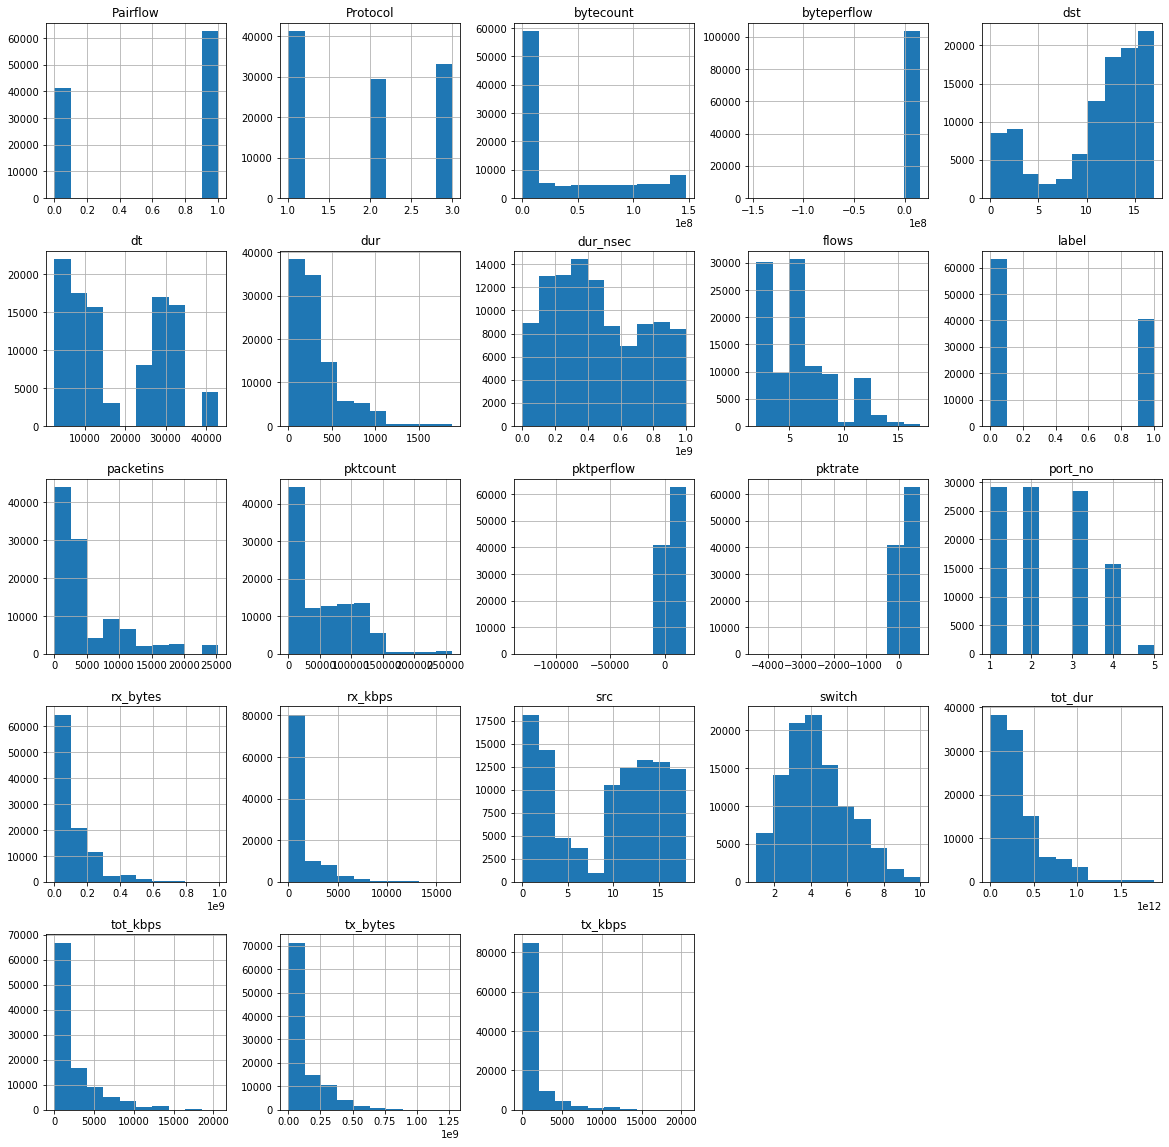

In [68]:
grafikValue = df.hist(figsize=(20,20))

## Check Heatmap

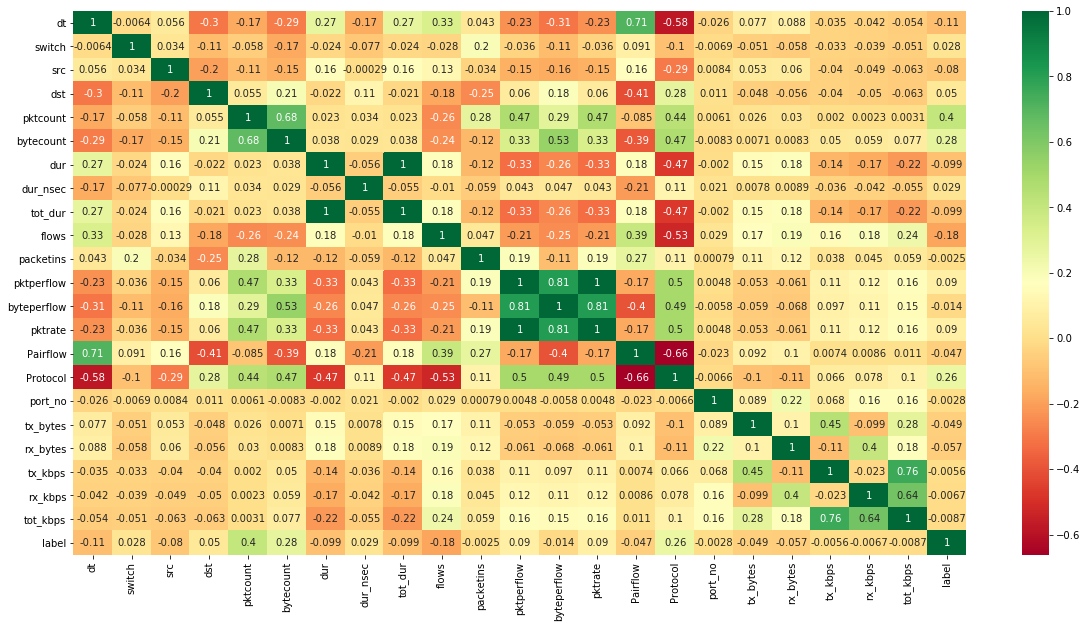

In [69]:
fig = plt.figure(figsize=(20,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

*Dari heatmap bisa dipilih menggunakan Protocol, Packet Rate, Packet Per Flow, Duration (sec, nsec), Bytecount, Packet Count, Source IP, Destination IP

## Check Outlier

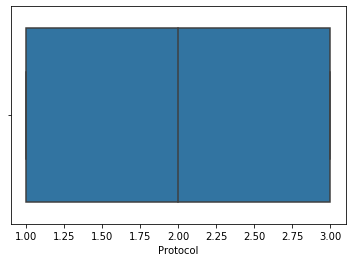

In [70]:
ax = sn.boxplot(x=df['Protocol'])

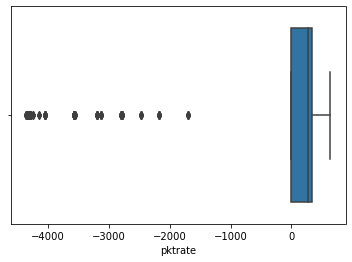

In [71]:
ax = sn.boxplot(x=df['pktrate'])

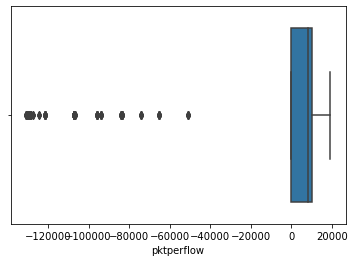

In [72]:
ax = sn.boxplot(x=df['pktperflow'])

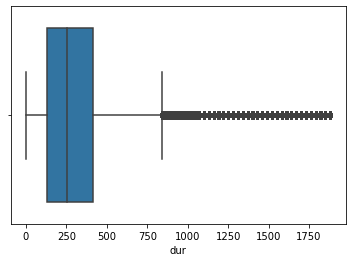

In [73]:
ax = sn.boxplot(x=df['dur'])

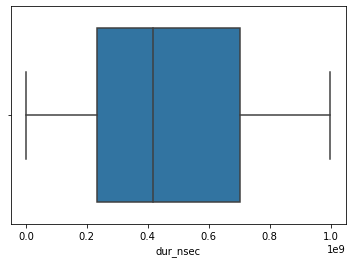

In [74]:
ax = sn.boxplot(x=df['dur_nsec'])

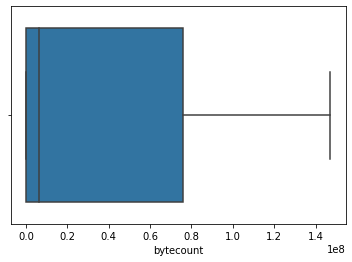

In [75]:
ax = sn.boxplot(x=df['bytecount'])

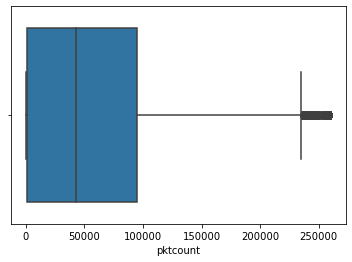

In [76]:
ax = sn.boxplot(x=df['pktcount'])

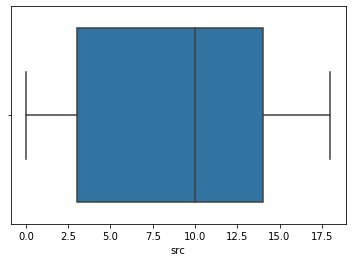

In [77]:
ax = sn.boxplot(x=df['src'])

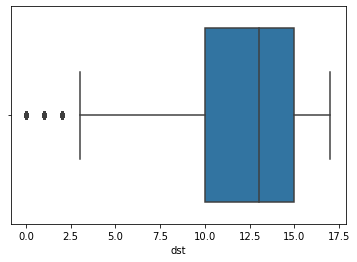

In [78]:
ax = sn.boxplot(x=df['dst'])

## Cleaning Outlier 

*Berdasarkan analisis yang dilakukan bahwa untuk fitur yang dapat di bersihkan outliernya berkaitan dengan perhitungan paket(rate, flow).
- durasi (bisa saja lebih dari waktu normal karena jaringan tertentu mengakses terus menerus)
- dst (karena ini tujuan yang di transformasi sehingga tidak ada alasan untuk dihapus karena menunjukkan alamat)
- pktcount (karena dengan count dari packet sendiri mungkin bisa over dalam hal ini bisa jadi fitur yang menandakan adanya overload dari packet)

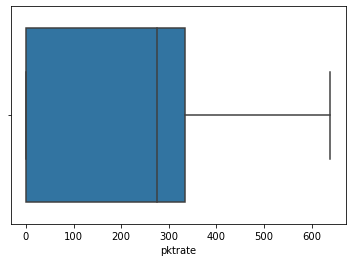

In [79]:
df.drop(df[df['pktrate'] < 0].index ,inplace =True)
ax = sn.boxplot(x=df['pktrate'])

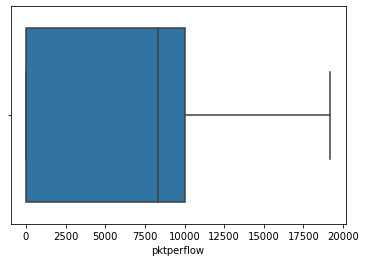

In [80]:
df.drop(df[df['pktperflow'] < 0].index ,inplace =True)
ax = sn.boxplot(x=df['pktperflow'])

In [81]:
df_final = df[['src','dst','Protocol', 'pktrate', 'pktperflow', 'dur', 'dur_nsec', 'bytecount', 'pktcount','label']]

In [82]:
df_final.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,0.0,16.0,3,451,13535,100,716000000,48294064,45304,0.0
1,0.0,16.0,3,451,13531,280,734000000,134737070,126395,0.0
2,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0.0
3,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0.0
4,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0.0


In [83]:
df_final.shape

(103651, 10)

Deleting Null Values in Dataset 

In [84]:
df_final.dropna(subset=['src'], inplace=True)
df.dropna(subset=['src'], inplace=True)


C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_final.isnull().sum()

src           0
dst           0
Protocol      0
pktrate       0
pktperflow    0
dur           0
dur_nsec      0
bytecount     0
pktcount      0
label         0
dtype: int64

## Check Optimum Feature Size

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [87]:
df['label'] = df['label'].astype(int)
df_final['label'] = df_final['label'].astype(int)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step= 1, cv=StratifiedKFold(2), scoring='accuracy')

note baca lagi mengenai SVC dan RFECV

**Raw Dataset**

In [89]:
# df_sample =  df.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

**Selected Feature**

In [90]:
# df_sample =  df_final.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

## Feature Selection

### Feature Selection Using Extra Tree Classifier

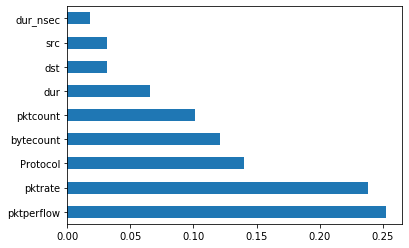

In [91]:
model= ExtraTreesClassifier() #model ini bisa dicari lagi alternatifnya mungkin ada metode lain butuh dasar paper
X = df_final[df_final.columns[:9]]
Y = df_final['label']
model.fit(X,Y)
importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
importance.nlargest(100).plot(kind='barh')
plt.show()

## Feature Selection Using Chi-Square Methods

In [92]:
X = df_final[df_final.columns[:9]]
Y = df_final['label']

#check best feature after k=9
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(20,'Score'))

      Feature         Score
7   bytecount  4.944504e+11
6    dur_nsec  1.673210e+10
8    pktcount  8.557566e+08
4  pktperflow  1.007541e+07
3     pktrate  3.378989e+05
5         dur  2.134401e+05
0         src  2.749368e+03
2    Protocol  2.456132e+03
1         dst  6.138652e+02


Dari sini kita bisa menguji untuk fitur bisa kita gunakan yang sudah ditentukan dari Heatmap, Extra Tree, atau menggunakan Chi-Square. 

Selain itu juga bisa dipertimbangkan untuk melakukan pengecekan irisannya dan terhadap dataset satu lagi bisa dilihat kemungkinan irisan ini ada di **dst, protocol, src, bytecount**

In [93]:
df_heatmap = df_final
df_feature_selection = df_final[['pktrate','pktperflow','Protocol', 'src','dst','label']].copy()
df_chi_square = df_final[['dst','src','Protocol','pktcount','pktcount','label']].copy()
df_slice = df_final[['dst','src','Protocol','bytecount','label']].copy()

## Check Final Dataset 

In [94]:
df_feature_selection.head(5)

,pktrate,pktperflow,Protocol,src,dst,label
0,451,13535,3,0.0,16.0,0
1,451,13531,3,0.0,16.0,0
2,451,13534,3,10.0,16.0,0
3,451,13534,3,10.0,16.0,0
4,451,13534,3,10.0,16.0,0


In [95]:
df_chi_square.head(5)

,dst,src,Protocol,pktcount,pktcount,label
0,16.0,0.0,3,45304,45304,0
1,16.0,0.0,3,126395,126395,0
2,16.0,10.0,3,90333,90333,0
3,16.0,10.0,3,90333,90333,0
4,16.0,10.0,3,90333,90333,0


In [96]:
df_slice.head(5)

,dst,src,Protocol,bytecount,label
0,16.0,0.0,3,48294064,0
1,16.0,0.0,3,134737070,0
2,16.0,10.0,3,96294978,0
3,16.0,10.0,3,96294978,0
4,16.0,10.0,3,96294978,0


In [97]:
df_heatmap.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,0.0,16.0,3,451,13535,100,716000000,48294064,45304,0
1,0.0,16.0,3,451,13531,280,734000000,134737070,126395,0
2,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0
3,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0
4,10.0,16.0,3,451,13534,200,744000000,96294978,90333,0


## Save

In [99]:
df_heatmap.to_csv("processed_dataset_10.csv", sep=',', index=False)
df_feature_selection.to_csv("processed_dataset_5.csv", sep=',', index=False)
df_chi_square.to_csv("processed_dataset_chi_square.csv", sep=',', index=False)
df_slice.to_csv('processed_dataset_slice.csv', sep=',', index=False)